## Task 2 - Customer Segmentation

### 1. Important Libraries

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.cluster import KMeans

### 2. Read Data and Show Info.

In [2]:
df = pd.read_csv(r"./Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 3. Analysis Dataset

#### 3.1 Info.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


##### 📊 Dataset Features

| Column Name               | Description                                                                 |
|---------------------------|-----------------------------------------------------------------------------|
| `CustomerID`              | A unique identifier for each customer                                       |
| `Genre`                   | Gender of the customer (`Male` or `Female`)                                 |
| `Age`                     | Age of the customer (in years)                                              |
| `Annual Income (k$)`      | The annual income of the customer (in thousands of dollars)                 |
| `Spending Score (1-100)`  | A score assigned by the mall based on customer behavior and spending habits |

#### 3.2 Describe

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### 3.4 Visualization

In [6]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

C:\Users\moham\AppData\Local\Temp\ipykernel_15920\3659646080.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Genre', palette='pastel')


<Axes: xlabel='Genre', ylabel='count'>

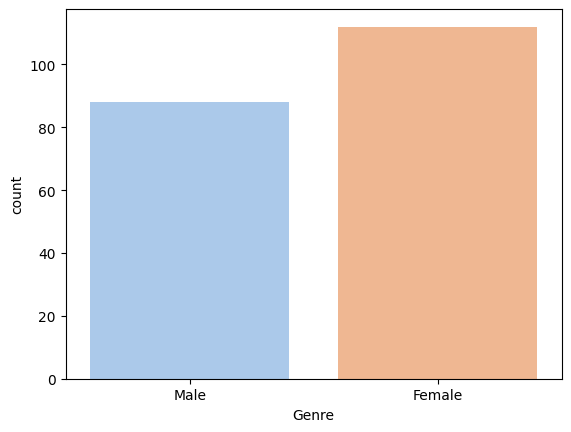

In [7]:
sns.countplot(data=df, x='Genre', palette='pastel')

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

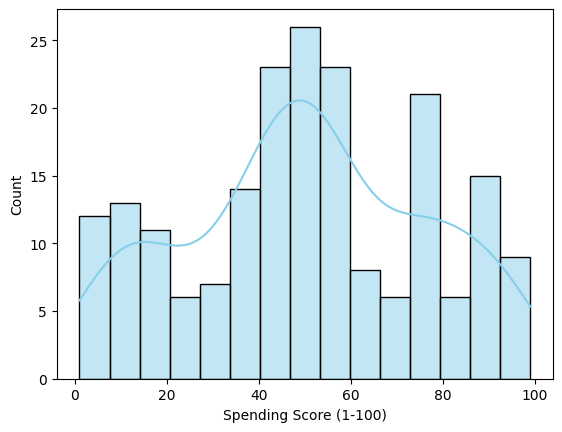

In [8]:
sns.histplot(df['Spending Score (1-100)'], bins=15, kde=True ,color='skyblue')

<Axes: xlabel='Age', ylabel='Count'>

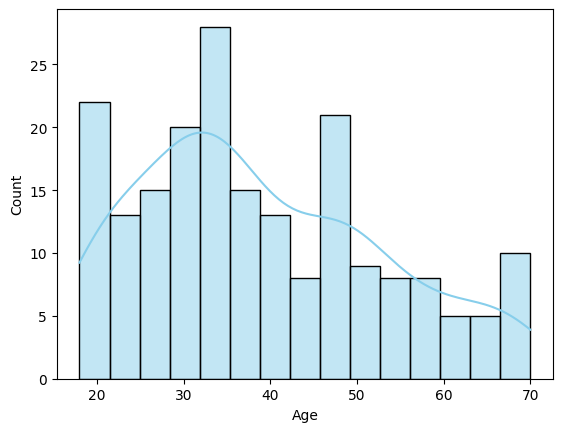

In [9]:
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')

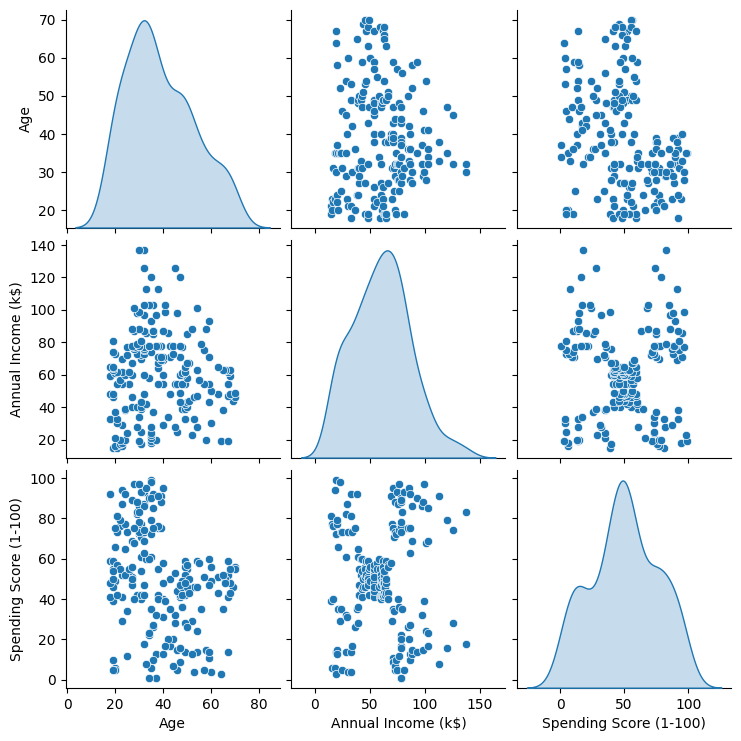

In [10]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind='kde')

### 4. Data Preprocessing 

#### 4.1 Correlation

In [11]:
df_copy = df.copy()

label = LabelEncoder()
for col in df_copy.columns:
    if df_copy[col].dtype == 'object':
        df_copy[col] = label.fit_transform(df_copy[col])
        
correlation_matrix = df_copy.corr()

C:\Users\moham\AppData\Local\Temp\ipykernel_15920\346275854.py:6: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


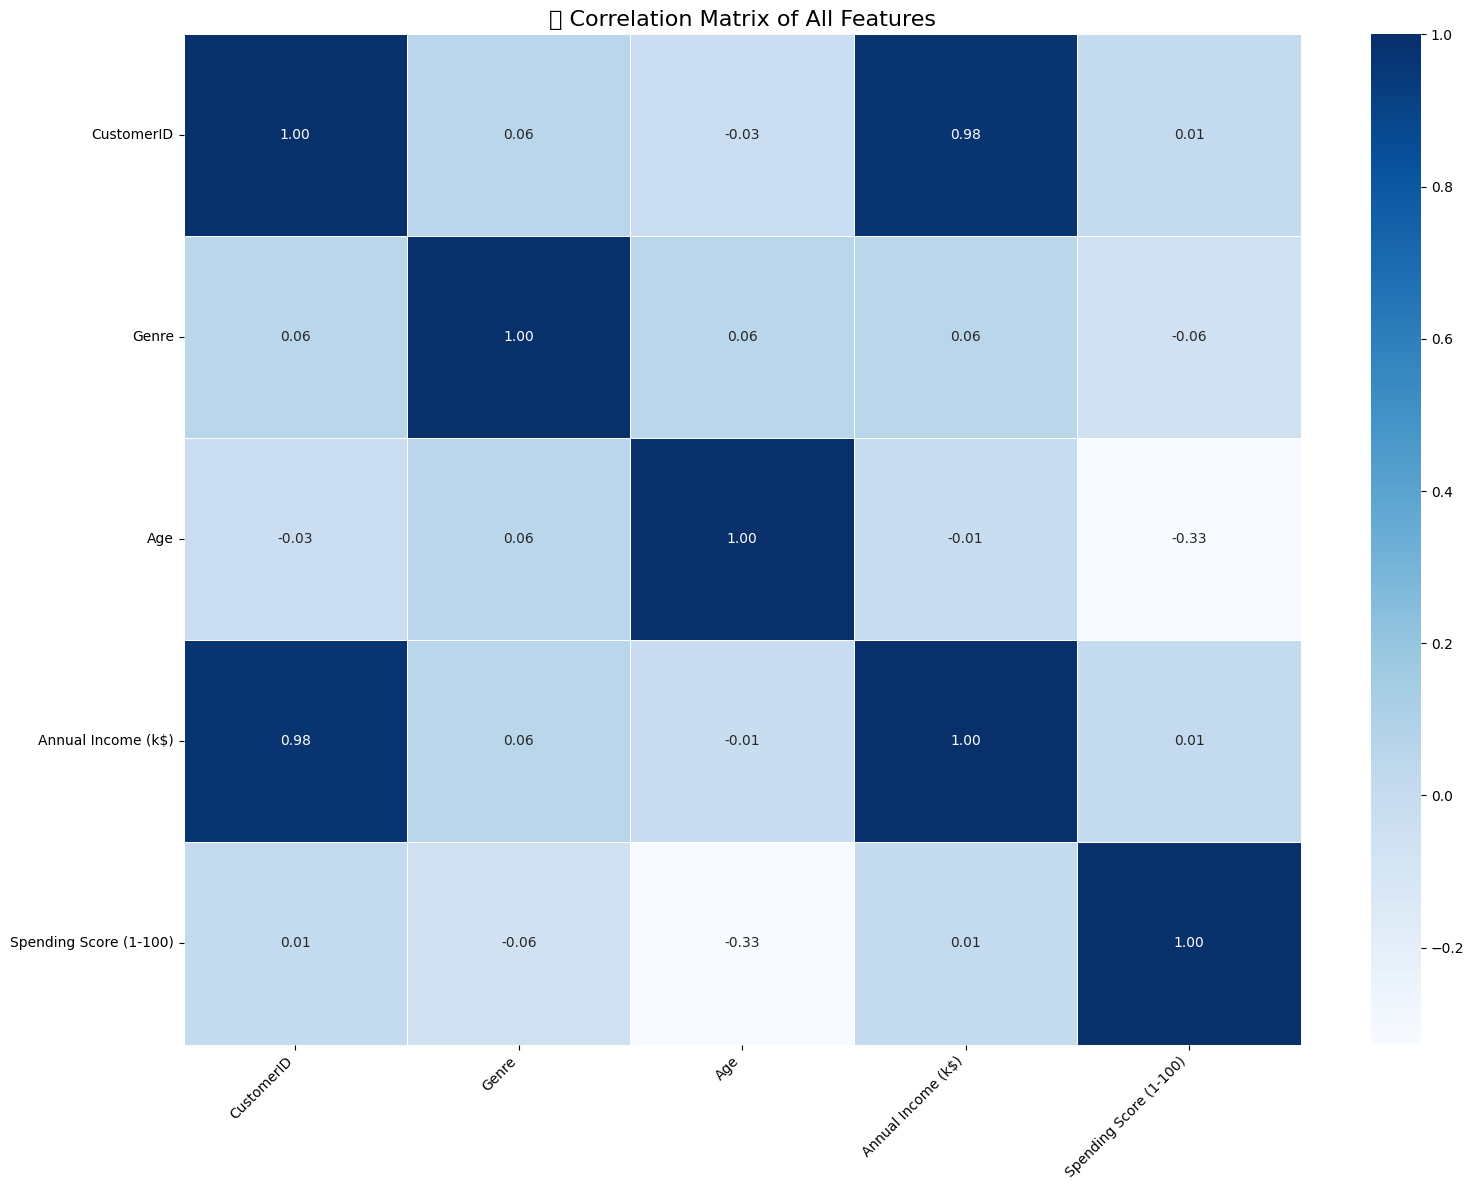

In [12]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5)
plt.title('🔍 Correlation Matrix of All Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### 4.2 Remove Unnecessary Columns

In [13]:
df = df.drop('CustomerID', axis=1)

In [14]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


#### 4.3 Check Missing Values 

In [15]:
df.replace(['NaN', 'nan', 'None', ''], pd.NA, inplace=True)

In [16]:
df.isna().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### 4.4 Check Duplication

In [17]:
df.duplicated().sum()

np.int64(0)

#### 4.5 Check Outliers

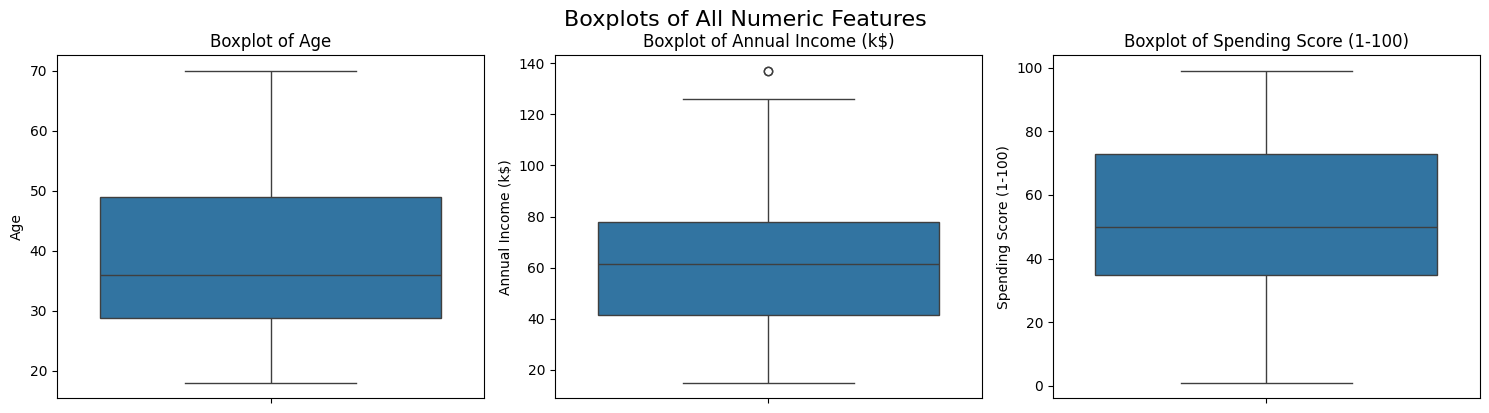

In [18]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

n = len(numeric_cols)
cols = 3  
rows = (n + cols - 1) // cols  
plt.figure(figsize=(5 * cols, 4 * rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[col])  
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.xlabel('')
    plt.tight_layout()

plt.suptitle("Boxplots of All Numeric Features", fontsize=16, y=1.02)
plt.show()

#### 4.6 Handle Categorical Features

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [20]:
df['Genre'] = label.fit_transform(df['Genre'])

In [21]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### 5. Choose Features

In [22]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [23]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### 6. Scalling Data

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

### 7. Elbow Method

In [27]:
val=[]

for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=123)
    kmeans.fit(X_scaled)
    val.append(kmeans.inertia_)
print(val)

[400.0, 272.4598145822962, 157.70400815035947, 109.22822707921344, 65.56840815571681, 55.103778121150576, 44.91118554999014, 39.51342048531434, 32.42168353234744, 29.685787841036316, 26.394692722125463, 24.26450800337065, 22.089106493384868, 19.51429566454985]


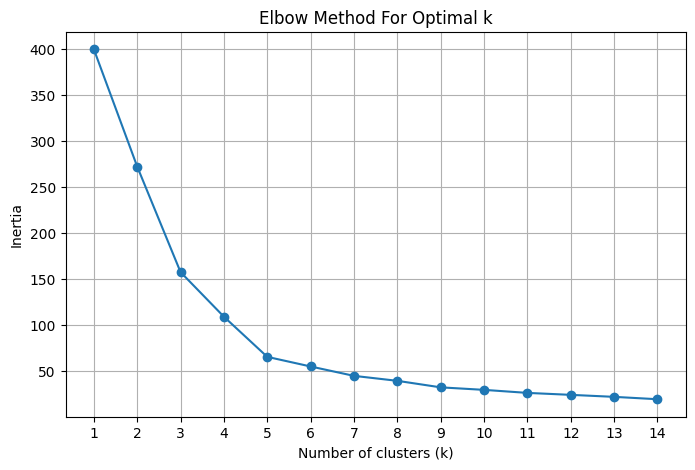

In [28]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 15), val, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 15))
plt.grid(True)
plt.show()

### 8. Modeling

In [29]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

In [30]:
y_kmeans = kmeans.fit_predict(X_scaled)

In [31]:
df['Cluster'] = y_kmeans

In [32]:
df['Cluster']

0      4
1      2
2      4
3      2
4      4
      ..
195    1
196    3
197    1
198    3
199    1
Name: Cluster, Length: 200, dtype: int32

In [33]:
print(kmeans.cluster_centers_)

[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]


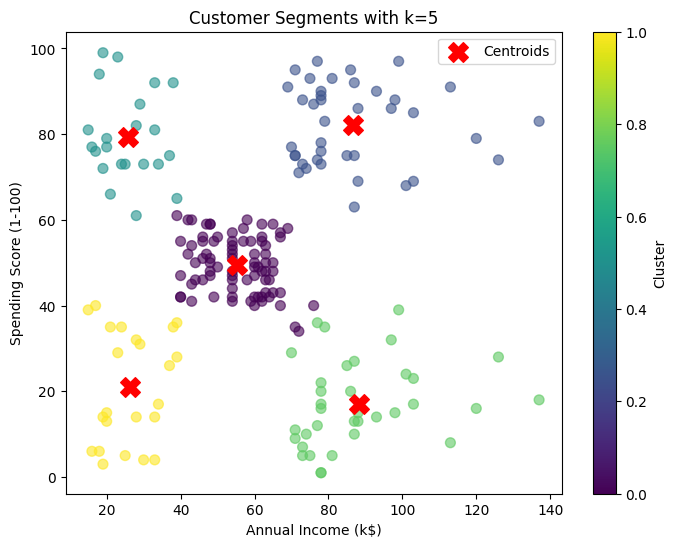

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], 
            c=y_kmeans, cmap='viridis', s=50, alpha=0.6)

centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments with k=5')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()